# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"
cities_df = pd.read_csv(output_data_file)
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
cities_df

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.74,2.68


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Set seed to reporduce results after book is run due to explaination of stats that state numeric values
np.random.seed(45)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# url for API call
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
# weather lists
city_id = -1
city_id_list = []
cities_list = []
cloudiness = []
country = []
date_time = []
humidity = []
lat = []
lng = []
temp_max = []
wind_speed = []
# counters
missing = 0
call_counter = 0
for city in cities:
    city_id += 1
    call_counter += 1
   
    # limit calls to 60 calls per minute
    if call_counter == 60:
        time.sleep(61)
        call_counter = 0
    try:
        print(f"Retrieving Results for Index {city_id}: {city}.")
        # API call/response
        response = requests.get(query_url+city).json()
        # obtain information from API call
        cities_list.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date_time.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        temp_max.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        city_id_list.append(city_id)
    except (KeyError, IndexError):
        print("Missing Field...skipping")
        missing += 1
        city_id -= 1
    print("-----------------------------------------------")

print("API calls complete")

Retrieving Results for Index 0: qaanaaq.
-----------------------------------------------
Retrieving Results for Index 1: itarema.
-----------------------------------------------
Retrieving Results for Index 2: saint-philippe.
-----------------------------------------------
Retrieving Results for Index 3: ushuaia.
-----------------------------------------------
Retrieving Results for Index 4: asau.
-----------------------------------------------
Retrieving Results for Index 5: bur gabo.
Missing Field...skipping
-----------------------------------------------
Retrieving Results for Index 5: punta arenas.
-----------------------------------------------
Retrieving Results for Index 6: mar del plata.
-----------------------------------------------
Retrieving Results for Index 7: vaini.
-----------------------------------------------
Retrieving Results for Index 8: ponta do sol.
-----------------------------------------------
Retrieving Results for Index 9: pangnirtung.
---------------------

-----------------------------------------------
Retrieving Results for Index 78: belmonte.
-----------------------------------------------
Retrieving Results for Index 79: voh.
-----------------------------------------------
Retrieving Results for Index 80: willowmore.
-----------------------------------------------
Retrieving Results for Index 81: xadani.
Missing Field...skipping
-----------------------------------------------
Retrieving Results for Index 81: mount isa.
-----------------------------------------------
Retrieving Results for Index 82: wulanhaote.
Missing Field...skipping
-----------------------------------------------
Retrieving Results for Index 82: ostrovnoy.
-----------------------------------------------
Retrieving Results for Index 83: innisfail.
-----------------------------------------------
Retrieving Results for Index 84: jamestown.
-----------------------------------------------
Retrieving Results for Index 85: butaritari.
-------------------------------------

-----------------------------------------------
Retrieving Results for Index 157: sao filipe.
-----------------------------------------------
Retrieving Results for Index 158: souillac.
-----------------------------------------------
Retrieving Results for Index 159: polunochnoye.
-----------------------------------------------
Retrieving Results for Index 160: wewak.
-----------------------------------------------
Retrieving Results for Index 161: luanda.
-----------------------------------------------
Retrieving Results for Index 162: kuusamo.
-----------------------------------------------
Retrieving Results for Index 163: havelock.
-----------------------------------------------
Retrieving Results for Index 164: krasnoarmeysk.
-----------------------------------------------
Retrieving Results for Index 165: sebeta.
-----------------------------------------------
Retrieving Results for Index 166: dicabisagan.
-----------------------------------------------
Retrieving Results for Ind

-----------------------------------------------
Retrieving Results for Index 235: palabuhanratu.
Missing Field...skipping
-----------------------------------------------
Retrieving Results for Index 235: whitehorse.
-----------------------------------------------
Retrieving Results for Index 236: taoudenni.
-----------------------------------------------
Retrieving Results for Index 237: andenes.
-----------------------------------------------
Retrieving Results for Index 238: talnakh.
-----------------------------------------------
Retrieving Results for Index 239: nelson bay.
-----------------------------------------------
Retrieving Results for Index 240: bengkulu.
-----------------------------------------------
Retrieving Results for Index 241: saint-leu.
-----------------------------------------------
Retrieving Results for Index 242: inhambane.
-----------------------------------------------
Retrieving Results for Index 243: mildura.
----------------------------------------------

-----------------------------------------------
Retrieving Results for Index 320: umm lajj.
-----------------------------------------------
Retrieving Results for Index 321: port hedland.
-----------------------------------------------
Retrieving Results for Index 322: portland.
-----------------------------------------------
Retrieving Results for Index 323: bosaso.
-----------------------------------------------
Retrieving Results for Index 324: mehamn.
-----------------------------------------------
Retrieving Results for Index 325: kyra.
-----------------------------------------------
Retrieving Results for Index 326: marrakesh.
-----------------------------------------------
Retrieving Results for Index 327: acajutla.
-----------------------------------------------
Retrieving Results for Index 328: mys shmidta.
Missing Field...skipping
-----------------------------------------------
Retrieving Results for Index 328: tinskoy.
-----------------------------------------------
Retrievi

-----------------------------------------------
Retrieving Results for Index 404: samdari.
-----------------------------------------------
Retrieving Results for Index 405: geraldton.
-----------------------------------------------
Retrieving Results for Index 406: road town.
-----------------------------------------------
Retrieving Results for Index 407: sisimiut.
-----------------------------------------------
Retrieving Results for Index 408: kahului.
-----------------------------------------------
Retrieving Results for Index 409: fez.
-----------------------------------------------
Retrieving Results for Index 410: doha.
-----------------------------------------------
Retrieving Results for Index 411: nichinan.
-----------------------------------------------
Retrieving Results for Index 412: caticlan.
-----------------------------------------------
Retrieving Results for Index 413: wala.
-----------------------------------------------
Retrieving Results for Index 414: general roc

-----------------------------------------------
Retrieving Results for Index 483: wasilla.
-----------------------------------------------
Retrieving Results for Index 484: bintulu.
-----------------------------------------------
Retrieving Results for Index 485: cody.
-----------------------------------------------
Retrieving Results for Index 486: bonavista.
-----------------------------------------------
Retrieving Results for Index 487: anklam.
-----------------------------------------------
Retrieving Results for Index 488: port shepstone.
-----------------------------------------------
Retrieving Results for Index 489: hofn.
-----------------------------------------------
Retrieving Results for Index 490: alta gracia.
-----------------------------------------------
Retrieving Results for Index 491: mogadishu.
-----------------------------------------------
Retrieving Results for Index 492: vanavara.
-----------------------------------------------
Retrieving Results for Index 493:

In [6]:
len(cities_list) + missing

601

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_df = pd.DataFrame({"City_ID": city_id_list,
                           "City": cities_list,
                           "Country": country,
                           "Cloudiness": cloudiness,
                           "Date": date_time,
                           "Humidity(%)": humidity,
                           "Lat": lat,
                           "Lng": lng,
                           "Max Temp (F)": temp_max,
                           "Wind Speed": wind_speed
                          })
weather_df["Date"]= pd.to_datetime(weather_df["Date"], unit="s").dt.date
weather_df.set_index("City_ID", inplace=True)
weather_df.to_csv("weather_df")
weather_df

,City,Country,Cloudiness,Date,Humidity(%),Lat,Lng,Max Temp (F),Wind Speed
City_ID,,,,,,,,,
0,Qaanaaq,GL,99,2021-02-15,88,77.4840,-69.3632,-3.24,2.04
1,Itarema,BR,47,2021-02-15,54,-2.9248,-39.9167,89.01,12.19
2,Saint-Philippe,RE,40,2021-02-15,69,-21.3585,55.7679,82.40,4.61
3,Ushuaia,AR,75,2021-02-15,58,-54.8000,-68.3000,57.20,5.75
4,Asău,RO,100,2021-02-15,55,46.4333,26.4000,26.01,8.50
...,...,...,...,...,...,...,...,...,...
548,Yangi Marg`ilon,UZ,0,2021-02-15,32,40.4272,71.7189,53.60,6.91
549,Kyshtovka,RU,100,2021-02-15,96,56.5550,76.6271,22.42,11.63
550,Fallon,US,90,2021-02-15,93,39.4735,-118.7774,39.20,10.36


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.
weather_df.sort_values(by="Humidity(%)", ascending=False).head()

,City,Country,Cloudiness,Date,Humidity(%),Lat,Lng,Max Temp (F),Wind Speed
City_ID,,,,,,,,,
332,Yoichi,JP,100,2021-02-15,100,43.2039,140.7703,37.00,1.54
203,Fortuna,US,90,2021-02-15,100,40.5982,-124.1573,52.00,4.61
250,Denizli Province,TR,90,2021-02-15,100,37.8402,29.0698,28.40,9.22
55,Sande,DE,100,2021-02-15,100,53.5049,8.0142,33.01,8.05
453,Vestmanna,FO,75,2021-02-15,100,62.1564,-7.1664,46.40,14.97


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

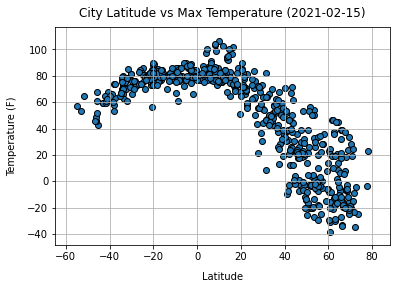

In [45]:
plt.scatter(lat,temp_max, edgecolors="black")
date = weather_df["Date"][0]
# labels
plt.title(f"City Latitude vs Max Temperature ({date})", y=1.02)
plt.xlabel("Latitude", labelpad=10)
plt.ylabel("Temperature (F)",labelpad=10)
# x & y limits
plt.ylim(min(temp_max)-10,max(temp_max)+10)
plt.xlim(min(lat)-10,max(lat)+10)
plt.grid()
plt.savefig("Images/Scatter Plot/Latitude_vs_temperature.png")
plt.show()

## Latitude vs. Humidity Plot

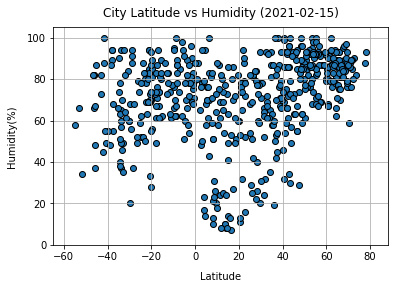

In [44]:
plt.scatter(lat,humidity, edgecolors="black")
# labels
plt.title(f"City Latitude vs Humidity ({date})", y=1.02)
plt.xlabel("Latitude", labelpad=10)
plt.ylabel("Humidity(%)",labelpad=10)
# x & y limits
plt.ylim(0,max(humidity)+5)
plt.xlim(min(lat)-10,max(lat)+10)
plt.grid()
plt.savefig("Images/Scatter Plot/Latitude_vs_humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

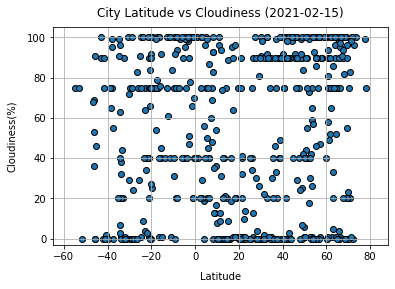

In [43]:
plt.scatter(lat,cloudiness, edgecolors="black")
# labels
plt.title(f"City Latitude vs Cloudiness ({date})", y=1.02)
plt.xlabel("Latitude", labelpad=10)
plt.ylabel("Cloudiness(%)",labelpad=10)
# x & y limits
plt.ylim(-3,max(cloudiness)+5)
plt.xlim(min(lat)-10,max(lat)+10)
plt.grid()
plt.savefig("Images/Scatter Plot/Latitude_vs_cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

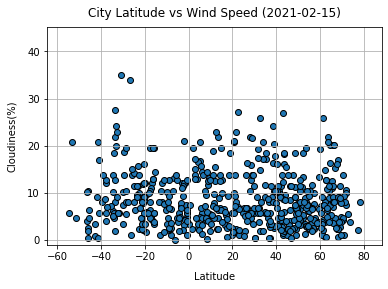

In [42]:
plt.scatter(lat,wind_speed, edgecolors="black")
# labels
plt.title(f"City Latitude vs Wind Speed ({date})", y=1.02)
plt.xlabel("Latitude", labelpad=10)
plt.ylabel("Cloudiness(%)",labelpad=10)
# x & y limits
plt.ylim(-1,max(wind_speed)+10)
plt.xlim(min(lat)-10,max(lat)+10)
plt.grid()
plt.savefig("Images/Scatter Plot/Latitude_vs_windspeed.png")
plt.show()

## Linear Regression

In [14]:
# Generate northern & southern hemisphere data
north_hemisphere = weather_df[weather_df["Lat"] >= 0]
south_hemisphere = weather_df[weather_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

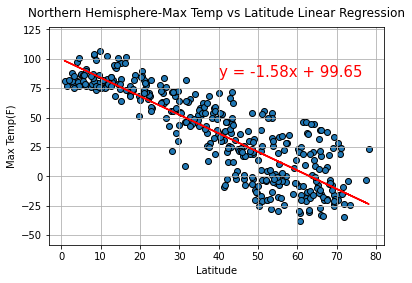

The correlation between both factors is -0.86
The r-squared is: 74.15%
Linear Equation: y = -1.58x + 99.65


In [39]:
# Regression equation & plot generation
x_values = north_hemisphere["Lat"]
y_values = north_hemisphere["Max Temp (F)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,85),fontsize=15,color="red")
# Labels
plt.title("Northern Hemisphere-Max Temp vs Latitude Linear Regression", y=1.02)
plt.xlabel("Latitude")
plt.ylabel("Max Temp(F)")
# x,y limits
plt.ylim(min(y_values)-20,max(y_values)+20)
plt.grid()
plt.savefig("Images/Linear Regression/NH_max_temp_linregress.png")
plt.show()
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-squared is: {round((rvalue**2)*100,2)}%")
print(f"Linear Equation: {line_eq}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.48698976478162215


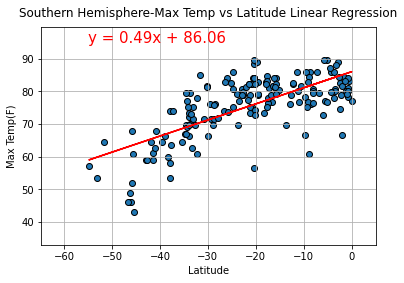

The correlation between both factors is 0.7
The r-squared is: 48.7%
Linear Equation: y = 0.49x + 86.06


In [32]:
x_values = south_hemisphere["Lat"]
y_values = south_hemisphere["Max Temp (F)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,95),fontsize=15,color="red")
plt.title("Southern Hemisphere-Max Temp vs Latitude Linear Regression", y=1.02)
plt.xlabel("Latitude")
plt.ylabel("Max Temp(F)")
print(f"The r-squared is: {rvalue**2}")
plt.ylim(min(y_values)-10,max(y_values)+10)
plt.xlim(min(x_values)-10,max(x_values)+5)
plt.grid()
plt.savefig("Images/Linear Regression/SH_max_temp_linregress.png")
plt.show()
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-squared is: {round((rvalue**2)*100,2)}%")
print(f"Linear Equation: {line_eq}")

## Explaination of Max Temp vs Latitude for the northern & southern hemisphere

### Northern Hemisphere Regression
* The relationship between latitudes and max temperatures in the northern hemisphere seem to indicate a strong negative correlation (correlation -0.85). As the latitude increases, moves away from the equator (0), the max temperature decreases in a linear fashion. The r-squared value of 71.88% which indicates the regression equation model explains a majority of the variation from the regression line for the northern hemisphere. This model would reasonably predict approximate temperatures based on latitudes in the northern hemisphere. Latitudes further from the equator would expect lower temperatures.

### Southern Hemisphere Regression
* Based on our northern hemisphere data, we would expect the relationship between the latitudes in the southern hemisphere to be mirror that of the northern hemisphere but in a positive correlation. We would expect to see that latitudes closer to the equator (0) would have higher temperatures than those further away. The r-squared is much lower and the correlation coefficient is not as strong as the data here seems to have more noise (variance) than the northern hemisphere data. The correlation of 0.58 indicates a moderate positive correlation. As seen in the regression plot, the southern hemisphere is much warmer than the northern hemisphere with temperatures that are more varied from the regression line based on the plot visualization. The greater variation in the southern hemisphere could be explained by the fact that there is much more water which heats up and cools off more slowly generating more variable data versus the northern hemisphere that has more land. Accurately predicting the temperature in the southern hemisphere based on latitudes with our regression model would be more difficult due to the increased variance in the data. However, we can still see that a relationship exists between latitudes and max temperatures for the southern hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

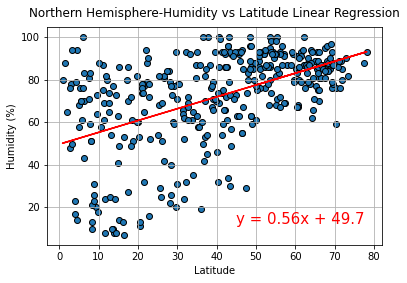

The correlation between both factors is 0.51
The r-squared is: 26.12%
Linear Equation: y = 0.56x + 49.7


In [33]:
x_values = north_hemisphere["Lat"]
y_values = north_hemisphere["Humidity(%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,12),fontsize=15,color="red")
plt.title("Northern Hemisphere-Humidity vs Latitude Linear Regression", y=1.02)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("Images/Linear Regression/NH_humidity_linregress.png")
plt.show()
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-squared is: {round((rvalue**2)*100,2)}%")
print(f"Linear Equation: {line_eq}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

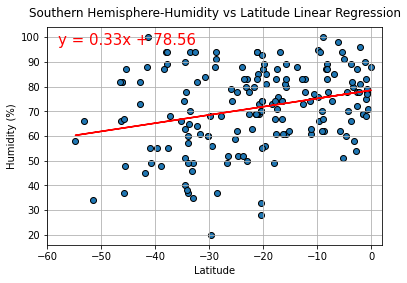

The correlation between both factors is 0.28
The r-squared is: 7.79%
Linear Equation: y = 0.33x + 78.56


In [34]:
x_values = south_hemisphere["Lat"]
y_values = south_hemisphere["Humidity(%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-58,97),fontsize=15,color="red")
plt.title("Southern Hemisphere-Humidity vs Latitude Linear Regression", y=1.02)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(-60,2)
plt.grid()
plt.savefig("Images/Linear Regression/SH_humidity_linregress.png")
plt.show()
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-squared is: {round((rvalue**2)*100,2)}%")
print(f"Linear Equation: {line_eq}")

## Explanation of Humidity (%) vs. Latitude Linear Regression
* The regression models for humidity vs latitude there is either a very weak or no correlation between these two variables. The northern hemisphere data has a correlation coefficient of 0.38 indicating a possible weak positive correlation. Visually the northern data looks very scattered and this is associated with a low r-squared value of 14.42%. Southern hemisphere data the correlation coefficient is 0.39 which either indicated no or very weak positive correlation with an r-squared value of 15.44% which is low indicating the data varies greatly from the regression line.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

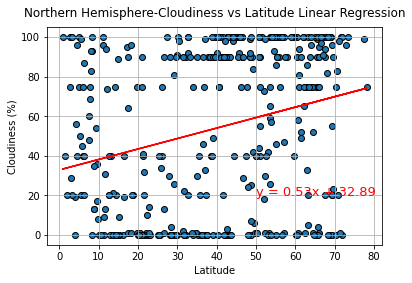

The correlation between both factors is 0.27
The r-squared is: 7.19%
Linear Equation: y = 0.53x + 32.89


In [35]:
x_values = north_hemisphere["Lat"]
y_values = north_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=13,color="red")
plt.title("Northern Hemisphere-Cloudiness vs Latitude Linear Regression", y=1.02)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("Images/Linear Regression/NH_cloudiness_linregress.png")
plt.show()
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-squared is: {round((rvalue**2)*100,2)}%")
print(f"Linear Equation: {line_eq}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

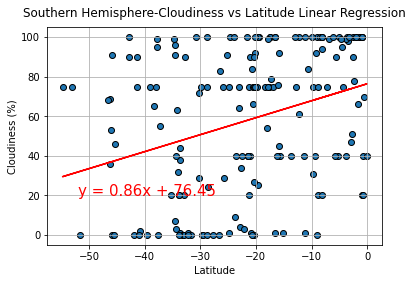

The correlation between both factors is 0.32
The r-squared is: 9.99%
Linear Equation: y = 0.86x + 76.45


In [36]:
x_values = south_hemisphere["Lat"]
y_values = south_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-52,20),fontsize=15,color="red")
plt.title("Southern Hemisphere-Cloudiness vs Latitude Linear Regression", y=1.02)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("Images/Linear Regression/SH_cloudiness_linregress.png")
plt.show()
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-squared is: {round((rvalue**2)*100,2)}%")
print(f"Linear Equation: {line_eq}")

## Explaination of Cloudiness (%) vs. Latitude Linear Regression
* There is not a detectable relationship between cloud coverage and latitude for either northern or southern hemispheres. The data appears very scattered and although visually the best fit regression line looks moderately positive, the correlation coefficient for both hemispheres is between 0.24-0.35 indicating a negligable correlation. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

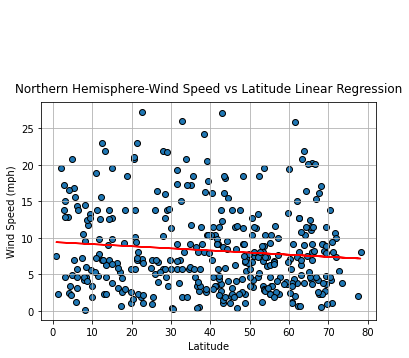

The correlation between both factors is -0.1
The r-squared is: 1.06%
Linear Equation: y = -0.03x + 9.43


In [37]:
x_values = north_hemisphere["Lat"]
y_values = north_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=15,color="red")
plt.title("Northern Hemisphere-Wind Speed vs Latitude Linear Regression", y=1.02)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("Images/Linear Regression/NH_windspeed_linregress.png")
plt.show()
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-squared is: {round((rvalue**2)*100,2)}%")
print(f"Linear Equation: {line_eq}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

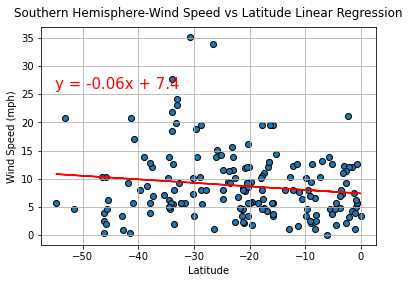

The correlation between both factors is -0.14
The r-squared is: 1.98%
Linear Equation: y = -0.06x + 7.4


In [40]:
x_values = south_hemisphere["Lat"]
y_values = south_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,26),fontsize=15,color="red")
plt.title("Southern Hemisphere-Wind Speed vs Latitude Linear Regression", y=1.02)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("Images/Linear Regression/SH_windspeed_linregress.png")
plt.show()
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-squared is: {round((rvalue**2)*100,2)}%")
print(f"Linear Equation: {line_eq}")

## Explaination of Wind Speed (mph) vs. Latitude Linear Regression
* For both the northern and southern hemisphere there is not a clear relationship between latitude and wind speed. The data appears to be randomly scattered between 0-30 mph with 1 outlier in the northern region above 40 mph. The best fit line is pretty horizontal for both regions. The r-squared is very low for both regions and the correlation coefficient is also very low indicating that there is not a detectable relationship between latitude and wind speed. 